# Bounds on the Ergodic Capacity for Dependent Fading Channels

_Author:_ Karl-Ludwig Besser, Technische Universität Braunschweig, Germany

This notebook is part of the paper "..." (DOI:XXX).  
If you use any of this work, please cite the above paper.

> If you are not familiar with Jupyter notebooks: The easiest way to use this notebook interactively, is to hit `Kernel --> Restart & Run All` in the menu. The will execute all cells and enable the interactive elements of the plots.  
> Alternatively, you can execute the cells one by one using Shift+Return

In [5]:
import numpy as np
from scipy import stats
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual, BoundedIntText

TODO: Text

## Homogeneous Rayleigh Fading

The first example is homogeneous Rayleigh fading. Each fading gain ${X}_i$ is exponentially distributed, i.e., ${X}_i\sim\exp(1)$.

In [3]:
from rayleigh_fading import (rayleigh_best_ergodic_ra, rayleigh_comon_ergodic, rayleigh_iid_ergodic, 
                             rayleigh_worst_ergodic_ra, rayleigh_best_ergodic)
rayleigh_best_ergodic = np.vectorize(rayleigh_best_ergodic)

In [26]:
def plot_rayleigh():
    n = np.arange(2, 21)
    fig, axs = plt.subplots()
    func_ra = {"Best Case RA": (rayleigh_best_ergodic_ra, 'b'),
               "Worst Case RA": (rayleigh_worst_ergodic_ra, 'r')}
    plots_ra = {k: axs.plot(n, np.zeros((len(n), 2)), '--', label=k, c=v[1]) for k, v in func_ra.items()}
    # Non-RA curves
    func = {"Independent": (rayleigh_iid_ergodic, 'g'),
            "Comonotonic": (rayleigh_comon_ergodic, 'orange'),
            "Best Case Exact": (rayleigh_best_ergodic, "cyan")}
    plots = {k: axs.plot(n, np.zeros_like(n), label=k, c=v[1])[0] for k, v in func.items()}
    
    axs.set_xlabel("Number of Channels $n$")
    axs.set_ylabel("Ergodic Capacity $C$")
    axs.set_xlim([2, 20])
    axs.set_ylim([0, 10])
    axs.legend()
    
    def update_plot(snr_db=10., num_levels=1000):
        snr = 10**(snr_db/10.)
        for _name, (_func, _color) in func_ra.items():
            values = np.array([_func(snr, _n, num_levels=num_levels) for _n in n])
            plots_ra[_name][0].set_ydata(values[:, 0])
            plots_ra[_name][1].set_ydata(values[:, 1])
        for _name, (_func, _color) in func.items():
            values = np.array(_func(snr, n))
            plots[_name].set_ydata(values)
    interact_manual(update_plot, snr_db=(0, 20, 1),
                    num_levels=BoundedIntText(value=1000, min=5, max=2000,
                                              description="Number of Quantization Levels:"))

<IPython.core.display.Javascript object>


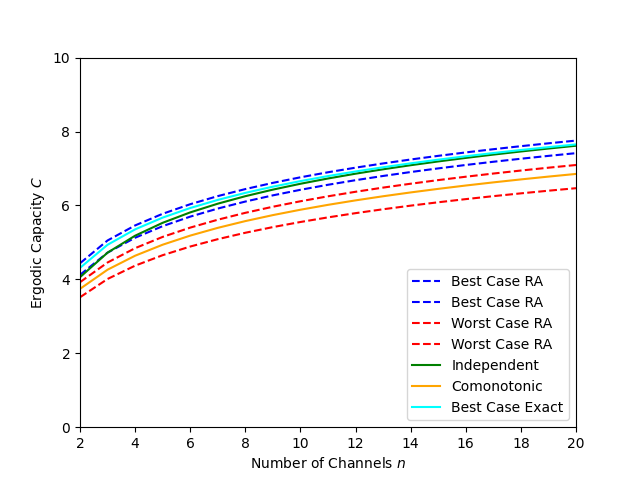

interactive(children=(IntSlider(value=10, description='snr_db', max=20), BoundedIntText(value=1000, descriptio…

In [27]:
plot_rayleigh()

## Arbitrary Fading Distributions

TODO: Text

In [28]:
from mixed_marginals import mixed_best_ergodic_ra, mixed_comonotonic, mixed_independent, mixed_worst_ergodic_ra

In [37]:
def plot_mixed_marginals():
    snr_db = np.arange(0, 21)
    snr = 10**(snr_db/10.)
    
    fig, axs = plt.subplots()
    func_ra = {"Best Case RA": (mixed_best_ergodic_ra, 'b'),
               "Worst Case RA": (mixed_worst_ergodic_ra, 'r')}
    plots_ra = {k: axs.plot(snr_db, np.zeros((len(snr), 2)), '--', label=k, c=v[1])
                for k, v in func_ra.items()}
    # Non-RA curves
    func = {"Independent": (mixed_independent, 'g'),
            "Comonotonic": (mixed_comonotonic, 'orange')}
    plots = {k: axs.plot(snr_db, np.array([v[0](_snr) for _snr in snr]), label=k, c=v[1])[0]
             for k, v in func.items()}
    
    axs.set_xlabel("SNR $\\rho$ [dB]")
    axs.set_ylabel("Ergodic Capacity $C$")
    axs.set_xlim([0, 20])
    axs.set_ylim([0, 10])
    axs.legend()
    
    def update_plot(num_levels=1000):
        for _name, (_func, _color) in func_ra.items():
            values = np.array([_func(_snr, 3, num_levels=num_levels) for _snr in snr])
            plots_ra[_name][0].set_ydata(values[:, 0])
            plots_ra[_name][1].set_ydata(values[:, 1])

    interact_manual(update_plot, num_levels=BoundedIntText(value=1000, min=5, max=2000,
                                                           description="Number of Quantization Levels:"))

<IPython.core.display.Javascript object>


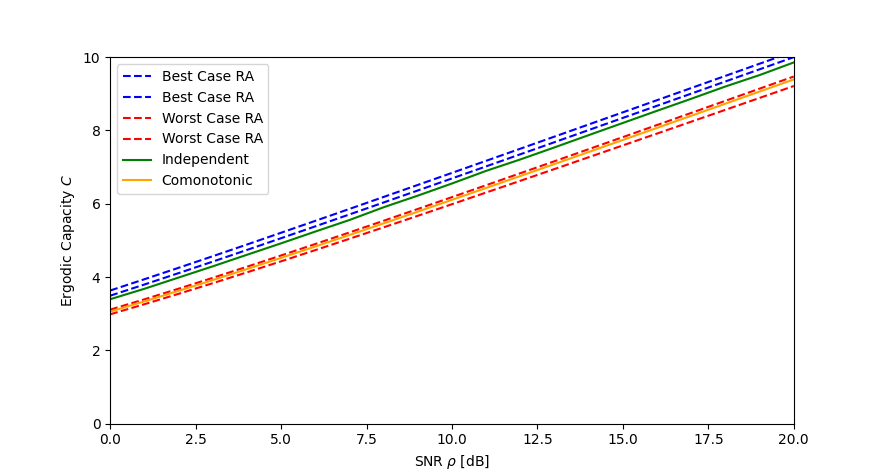

interactive(children=(BoundedIntText(value=1000, description='Number of Quantization Levels:', max=2000, min=5…

In [38]:
plot_mixed_marginals()